In [1]:

# Import Systems 
import struct
import io
import os
import sys
import time
import platform

# Import Audio
import pyaudio
import librosa
import soundfile

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyOssFilter
import pyRoomAcoustic as room
import pyOssDebug as dbg


In [2]:
# Load Original Audio File

####################################
# 임펄스 음원
####################################
imp_dir = 'ju_impulse'         # 임펄스 음원 파일이 있는 프로젝트 내 폴더명

# imp_name = 'ju_imp_goyang_aramnuri_concerthall'
# imp_name = 'ju_imp_sejongmunhwahuigwan_chamberhall'
imp_name = 'Impulse_201125_JU_SoundLab_Ori_mono_48k_32i'
# imp_name = 'Impulse_201125_JU_SoundLab_Aram_mono_48k_32i'
# imp_name = 'Impulse_201125_JU_SoundLab_Daegu_mono_48k_32i'
# imp_name = 'Impulse_201125_JU_SoundLab_Sejong_mono_48k_32i'

# 파일명 조합
imp_fname = pyOssWavfile.str_fname(imp_dir, imp_name)

# Check Wav Header Information
st_fmt_i = pyOssWavfile.extractWavFmtChunk( pyOssWavfile.read_format(imp_fname) )
dbg.dWavInfo(st_fmt_i)

# Load Original Audio & Convert format mono / float32 / 44.1kHz 
chunk_i, data_i, st_fmt_i, t_i = pyOssWavfile.readf32( imp_fname )
dbg.dWavInfo(st_fmt_i)
print(f"Time(sec) =", t_i)


#####################################
# 무향실 음원
#####################################
str_fileinfo = '_mono_f32_44.1k'    # 파일명에 부가된 정보

audio_dir = 'audiofiles'

# TEST AUDIO WAVE FILE LIST
# wav_name = "adult_female_speech"
# wav_name = "bagpipe_music"
# wav_name = "bagpipe_steady_chord"
# wav_name = "flute_arpeggio"
# wav_name = "flute_music"
wav_name = "singing"
# wav_name = "tuba_arpeggio"
# wav_name = "tuba_music"

# audio_dir = 'ju_anechoic'       # 무향실 음원 파일이 있는 프로젝트 내 폴더명

# wav_name = 'ju_anecho_Kor_Trad_Daeguem' 
# wav_name = 'ju_anecho_Kor_Trad_Gayageum'
# wav_name = 'ju_anecho_Kor_Trad_Haeguem'
# wav_name = 'ju_anecho_Kor_Trad_Janggu'
# wav_name = 'ju_anecho_Kor_Trad_Pansori'
# wav_name = 'ju_anecho_Kor_Trad_Piri'
# wav_name = 'ju_anecho_Musical_Female'
# wav_name = 'ju_anecho_Musical_Male'
# wav_name = 'ju_anecho_Thea_Dialog'
# wav_name = 'ju_anecho_Thea_Female'
# wav_name = 'ju_anecho_Thea_Male'

# 파일명 조합
wav_fname = pyOssWavfile.str_fname(audio_dir, wav_name + str_fileinfo)

# Check Wav Header Information
st_fmt_a = pyOssWavfile.extractWavFmtChunk( pyOssWavfile.read_format(wav_fname) )
dbg.dWavInfo(st_fmt_a)

# Load Original Audio & Convert format mono / float32 / 44.1kHz 
chunk_a, data_a, st_fmt_temp, t_a = pyOssWavfile.readf32( wav_fname )
print(f"Time(sec) =", t_a)


Audio Format = Int
Number of Channel = 1
Sampling Frequency = 48000
Bits per Sample = 16
Audio Format = float
Number of Channel = 1
Sampling Frequency = 44100
Bits per Sample = 32
Time(sec) = 5.461337868480726
Audio Format = float
Number of Channel = 1
Sampling Frequency = 44100
Bits per Sample = 32
Time(sec) = 4.872358276643991


0.032063492063492065


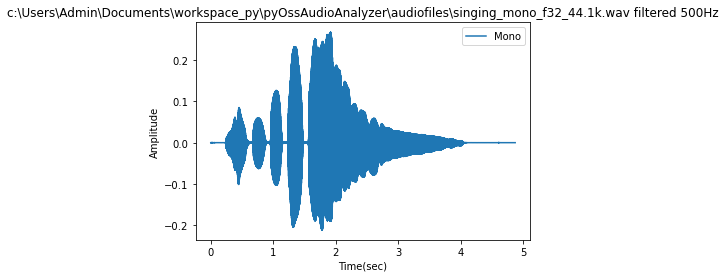

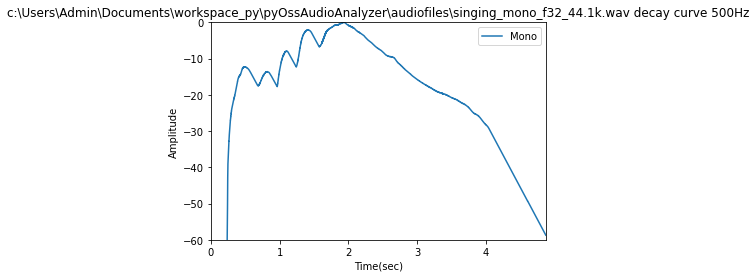

Impulse Name: c:\Users\Admin\Documents\workspace_py\pyOssAudioAnalyzer\audiofiles\singing_mono_f32_44.1k.wav, Filter: Butterworth 2nd Order, 500Hz
T10= [[0.683]]
T20= [[1.591]]
T30= [[2.23]]
RT60(from T30*2)= [[4.46]]
EDT= [[4.098]]
D50= 2.73491372278643e-08
C50= -75.63056357748687
C80= -74.75578402257207
{'RT60': array([[4.46]]), 'EDT': array([[4.098]]), 'D50': 2.73491372278643e-08, 'C50': -75.63056357748687, 'C80': -74.75578402257207}


In [3]:
fc = 500        # Center freq for bandpass filter 500Hz

data_filt, decay, a_param = pyOssFilter.calc_filt_impulse(data_a, st_fmt_a.fs, fc, fname=wav_fname)
